# Estimators figures generation

#### Notebook setup

In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Plot helper functions
from ministats import plot_pdf
from ministats.utils import savefigure

In [3]:
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn't work
from plot_helpers import RCPARAMS
# RCPARAMS.update({'figure.figsize': (10, 3)})   # good for screen
RCPARAMS.update({'figure.figsize': (5, 1.6)})  # good for print
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc=RCPARAMS,
)

# Useful colors
snspal = sns.color_palette()
blue, orange, purple = snspal[0], snspal[1], snspal[4]

# High-resolution please
%config InlineBackend.figure_format = 'retina'

# Where to store figures
DESTDIR = "figures/stats/estimators"

<Figure size 640x480 with 0 Axes>

In [4]:
# set random seed for repeatability
np.random.seed(42)

In [5]:
#######################################################

$\def\stderr#1{\mathbf{se}_{#1}}$
$\def\stderrhat#1{\hat{\mathbf{se}}_{#1}}$
$\newcommand{\Mean}{\textbf{Mean}}$
$\newcommand{\Var}{\textbf{Var}}$
$\newcommand{\Std}{\textbf{Std}}$
$\newcommand{\Freq}{\textbf{Freq}}$
$\newcommand{\RelFreq}{\textbf{RelFreq}}$
$\newcommand{\DMeans}{\textbf{DMeans}}$
$\newcommand{\Prop}{\textbf{Prop}}$
$\newcommand{\DProps}{\textbf{DProps}}$


(this cell contains the macro definitions $\stderr{\theta}$, $\stderrhat{}$, $\Mean$, ...)

## Definitions



## Estimators



### Sample mean estimator


In [6]:
def mean(sample):
    return sum(sample) / len(sample)

### Sample variance and standard deviation


In [7]:
def var(sample):
    xbar = mean(sample)
    sumsqdevs = sum([(xi-xbar)**2 for xi in sample])
    return sumsqdevs / (len(sample)-1)

In [8]:
def std(sample):
    s2 = var(sample)
    return np.sqrt(s2)


### Example 1: apple weight mean and variance


In [9]:
apples = pd.read_csv("../datasets/apples.csv")
asample = apples["weight"]
asample.count()

30

In [10]:
mean(asample)

202.6

Let's also calculate the variance and the standard deviation of the sample of the apple weights:

In [11]:
var(asample), std(asample)

(345.9724137931035, 18.60033370112223)

In [12]:
# ALT. call `.describe()` to get five-point summary
asample.describe()

count     30.000000
mean     202.600000
std       18.600334
min      167.000000
25%      191.250000
50%      199.000000
75%      210.750000
max      245.000000
Name: weight, dtype: float64

### Example 2: kombucha volume mean and variance


In [13]:
kombucha = pd.read_csv("../datasets/kombucha.csv")
# kombucha

In [14]:
batch01 = kombucha[kombucha["batch"]==1]
ksample01 = batch01["volume"]
ksample01.count()

40

In [15]:
mean(ksample01)

999.10375

In [16]:
var(ksample01), std(ksample01)

(95.4365419871796, 9.769162808919686)

### Difference between sample means estimator

In [17]:
def dmeans(xsample, ysample):
    """
    Compute the difference between group means of the samples.
    """
    dhat = mean(xsample) - mean(ysample)
    return dhat

### Example 3: comparison of electricity prices

Let's compute the difference between means of the East and West electricity prices.

In [18]:
eprices = pd.read_csv("../datasets/eprices.csv")
# eprices

In [19]:
epricesW = eprices[eprices["loc"]=="West"]
pricesW = epricesW["price"]
pricesW.values

array([11.8, 10. , 11. ,  8.6,  8.3,  9.4,  8. ,  6.8,  8.5])

In [20]:
epricesE = eprices[eprices["loc"]=="East"]
pricesE = epricesE["price"]
pricesE.values

array([7.7, 5.9, 7. , 4.8, 6.3, 6.3, 5.5, 5.4, 6.5])

In [21]:
dmeans(pricesW, pricesE)

3.0000000000000018

## Sampling distributions




### Example 4

In [22]:
from ministats import gen_samples
from ministats import plot_samples
from ministats import gen_sampling_dist
from ministats import plot_sampling_dist

Let's generate $N=10$ samples $\mathbf{z}_1, \mathbf{z}_2, \mathbf{z}_3, \ldots, \mathbf{z}_{10}$, and compute the mean, the variance, and the standard deviation in each sample.

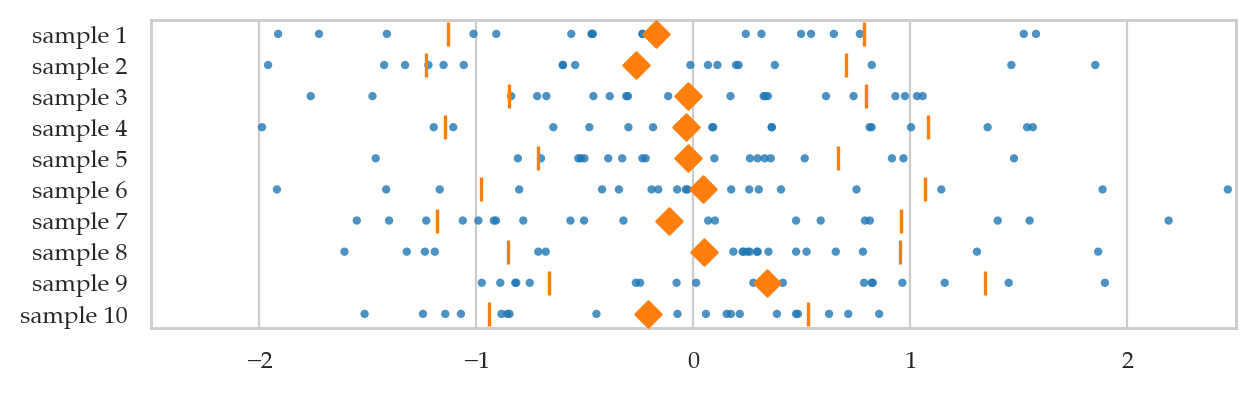

In [23]:
from scipy.stats import norm
rvZ = norm(0, 1)

zsamples_df = gen_samples(rvZ, n=20, N=10)
with plt.rc_context({"figure.figsize":(7, 2)}):
    ax = plot_samples(zsamples_df, xlims=[-2.5,2.5], showstd=True)

In [24]:
filename = os.path.join(DESTDIR, "samples_from_rvZ_n20_w_means_n_stds.pdf")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/samples_from_rvZ_n20_w_means_n_stds.pdf
Saved figure to figures/stats/estimators/samples_from_rvZ_n20_w_means_n_stds.png


Text(0, 0.5, '$f_{\\overline{\\mathbf{Z}}}$')

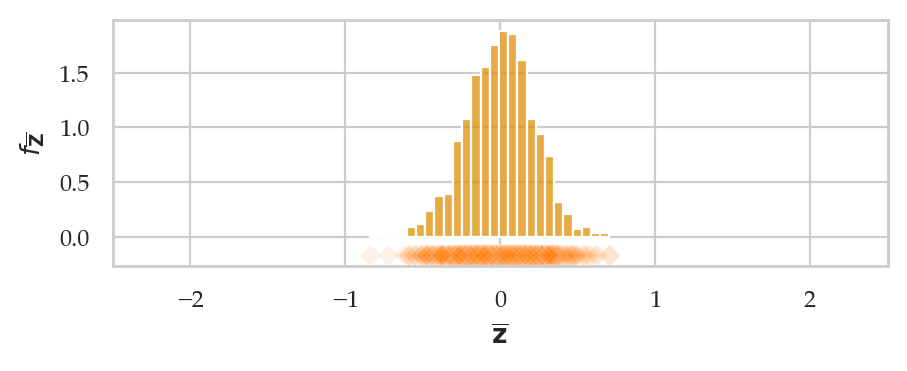

In [25]:
fig, ax = plt.subplots()

np.random.seed(43)
zbars = gen_sampling_dist(rvZ, estfunc=mean, n=20, N=1000)
plot_sampling_dist(zbars, ax=ax, binwidth=0.06, scatter="mean", filename=None)
ax.set_xlim([-2.5,2.5])
ax.set_xlabel(r"$\overline{\mathbf{z}}$")
ax.set_ylabel(r"$f_{\overline{\mathbf{Z}}}$")

In [26]:
filename = os.path.join(DESTDIR, "sampling_dist_mean_hist_and_strip_rvZ_n20_N1000.pdf")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/sampling_dist_mean_hist_and_strip_rvZ_n20_N1000.pdf
Saved figure to figures/stats/estimators/sampling_dist_mean_hist_and_strip_rvZ_n20_N1000.png


Text(0.5, 0, '$s_{\\mathbf{z}}$')

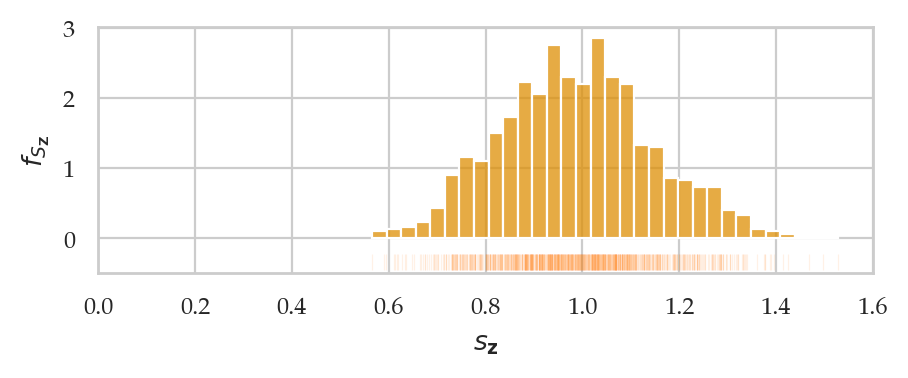

In [27]:
fig, ax = plt.subplots()

np.random.seed(44)
zstds = gen_sampling_dist(rvZ, estfunc=std, n=20, N=1000)
plot_sampling_dist(zstds, ax=ax, xlims=[0,1.6], binwidth=0.03, scatter="std", filename=None)
ax.set_ylabel(r"$f_{S_{\mathbf{Z}}}$")
ax.set_xlabel(r"$s_{\mathbf{z}}$")

In [28]:
filename = os.path.join(DESTDIR, "sampling_dist_std_hist_and_strip_rvZ_n20_N1000.pdf")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/sampling_dist_std_hist_and_strip_rvZ_n20_N1000.pdf
Saved figure to figures/stats/estimators/sampling_dist_std_hist_and_strip_rvZ_n20_N1000.png


### Estimator properties


### Computational approach to sampling distributions


In [29]:
from ministats import gen_sampling_dist

#### Example 5: sampling distributions of the kombucha volume

The probability distribution of the kombucha volume is know to
be $K \sim \mathcal{N}(\mu_K=1000, \sigma_K=10)$. This is an usual case where we know the population parameters,
but we'll investigate because it allows us to learn more about sampling distributions.

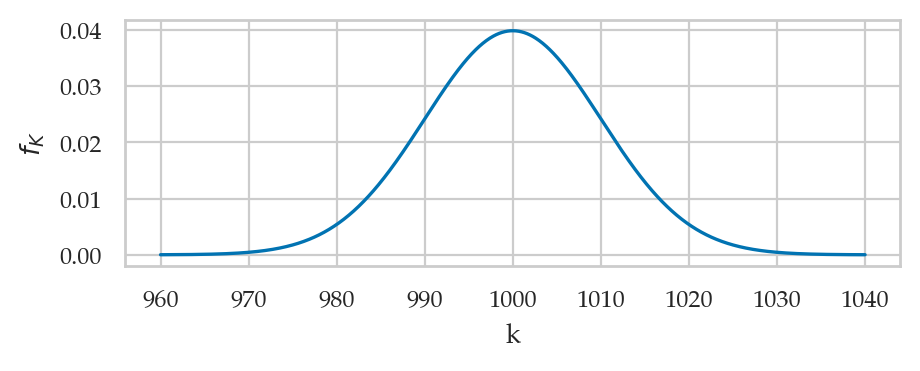

In [30]:
from scipy.stats import norm
muK = 1000
sigmaK = 10
rvK = norm(muK, sigmaK)

ax = plot_pdf(rvK, xlims=[960,1040], rv_name="K")

In [31]:
# TODO: add figure in text
filename = os.path.join(DESTDIR, "plot_pdf_normal_mu1000_sigma10.pdf")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/plot_pdf_normal_mu1000_sigma10.pdf
Saved figure to figures/stats/estimators/plot_pdf_normal_mu1000_sigma10.png


##### Sampling distribution of the mean

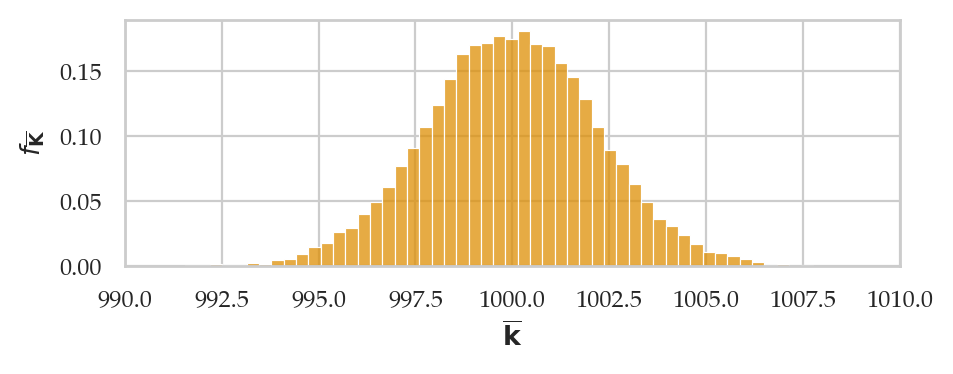

In [32]:
np.random.seed(43)
kbars20 = gen_sampling_dist(rvK, estfunc=mean, n=20)
ax = sns.histplot(kbars20, stat="density", bins=60, color=orange)
ax.set_xlim([990,1010])
ax.set_ylabel(r"$f_{\overline{\mathbf{K}}}$")
_ = ax.set_xlabel(r"$\overline{\mathbf{k}}$")

In [33]:
filename = os.path.join(DESTDIR, "sampling_dist_mean_rvK_n20.pdf")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/sampling_dist_mean_rvK_n20.pdf
Saved figure to figures/stats/estimators/sampling_dist_mean_rvK_n20.png


In [34]:
# observed,         population mean
np.mean(kbars20),   muK

(999.9759718368696, 1000)

In [35]:
# observed standard deviation
np.std(kbars20)

2.2080598530804387

In [36]:
# CLT prediction
sigmaK / np.sqrt(20)

2.23606797749979

##### Sampling distribution of the variance

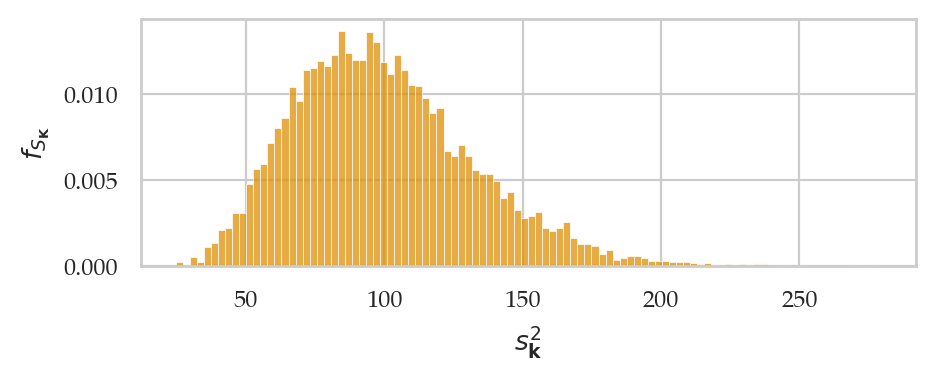

In [37]:
np.random.seed(44)
kvars20 = gen_sampling_dist(rvK, estfunc=var, n=20)
ax = sns.histplot(kvars20, stat="density", bins=100, color=orange)
ax.set_ylabel(r"$f_{S_{\mathbf{K}}}$")
_ = ax.set_xlabel(r"$s^2_{\mathbf{k}}$")

In [38]:
filename = os.path.join(DESTDIR, "sampling_dist_var_rvK_n20.pdf")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/sampling_dist_var_rvK_n20.pdf
Saved figure to figures/stats/estimators/sampling_dist_var_rvK_n20.png


The sample variance estimator is unbiased

In [39]:
# observed          # population var    
np.mean(kvars20),   sigmaK**2

(99.39922540353122, 100)

## Approximating sampling distribution

Let's look at a particular sample `ksample02` that comes from Batch 02 of the kombucha bottling plant.

In [40]:
kombucha = pd.read_csv("../datasets/kombucha.csv")
batch02 = kombucha[kombucha["batch"]==2]
ksample02 = batch02["volume"]
# ksample02

In [41]:
ksample02.count()

20

In [42]:
ksample02.values

array([ 995.83,  999.44,  978.64, 1016.4 ,  982.07,  991.58, 1005.03,
        987.55,  989.42,  990.91, 1005.51, 1022.92, 1000.42,  988.82,
       1005.39,  994.04,  999.81, 1011.75,  992.52, 1000.09])

<Axes: xlabel='k', ylabel='$f_{K}$'>

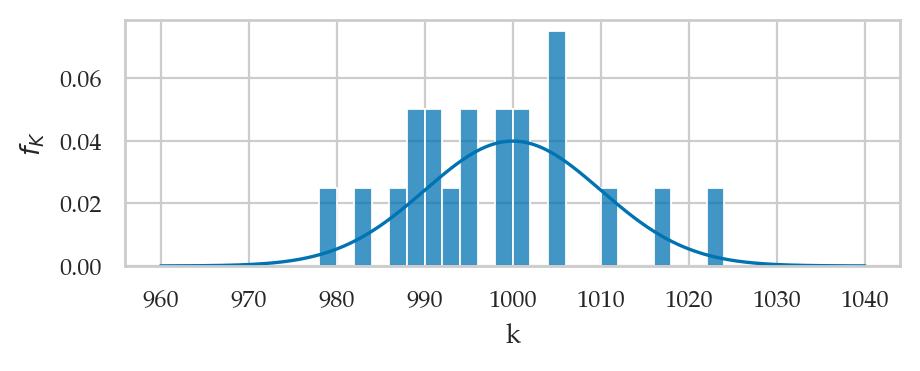

In [43]:
ax = plot_pdf(rvK, xlims=[960,1040], rv_name="K")
bins = range(970,1030,2)
sns.histplot(ksample02, ax=ax, stat="density", bins=bins)
# sns.histplot(ksample02, ax=ax, stat="density", bins=35)

In [44]:
filename = os.path.join(DESTDIR, "pdf_rvK_and_hist_ksample02_n20.pdf")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/pdf_rvK_and_hist_ksample02_n20.pdf
Saved figure to figures/stats/estimators/pdf_rvK_and_hist_ksample02_n20.png


In [45]:
mean(ksample02)

997.9069999999999

In [46]:
std(ksample02)

11.149780314097287

### Bootstrap estimation

#### Bootstrap figure

In [47]:
MINIPLOTSIZE = (4,1.5)
B = 3
seeds = [32,112,5,4,6,66,1121,12]
bins = range(970,1030,2)

Saved figure to figures/stats/estimators/miniplot_pdf_rvK.pdf
Saved figure to figures/stats/estimators/miniplot_pdf_rvK.png


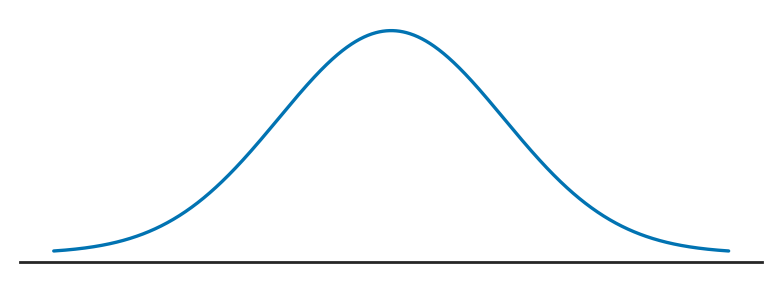

In [48]:
filename = os.path.join(DESTDIR, "miniplot_pdf_rvK.pdf")
with plt.rc_context({"figure.figsize":MINIPLOTSIZE}), sns.axes_style("ticks"):
    ax = plot_pdf(rvK, xlims=[970,1030], rv_name="K")
    ax.spines[['left', 'right', 'top']].set_visible(False)
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.set_ylabel(None)
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_xlabel(None)
    savefigure(ax, filename)

Saved figure to figures/stats/estimators/miniplot_hist_ksample02.pdf
Saved figure to figures/stats/estimators/miniplot_hist_ksample02.png


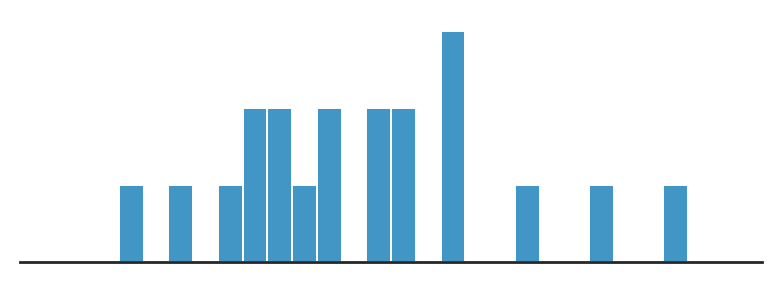

In [49]:
filename = os.path.join(DESTDIR, "miniplot_hist_ksample02.pdf")
with plt.rc_context({"figure.figsize":MINIPLOTSIZE}), sns.axes_style("ticks"):
    ax = sns.histplot(ksample02, stat="density", bins=bins)
    ax.set_xlim([970,1030])
    ax.spines[['left', 'right', 'top']].set_visible(False)
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.set_ylabel(None)
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_xlabel(None)
    savefigure(ax, filename)

Saved figure to figures/stats/estimators/miniplot_hist_bsamples_from_ksample02.pdf
Saved figure to figures/stats/estimators/miniplot_hist_bsamples_from_ksample02.png


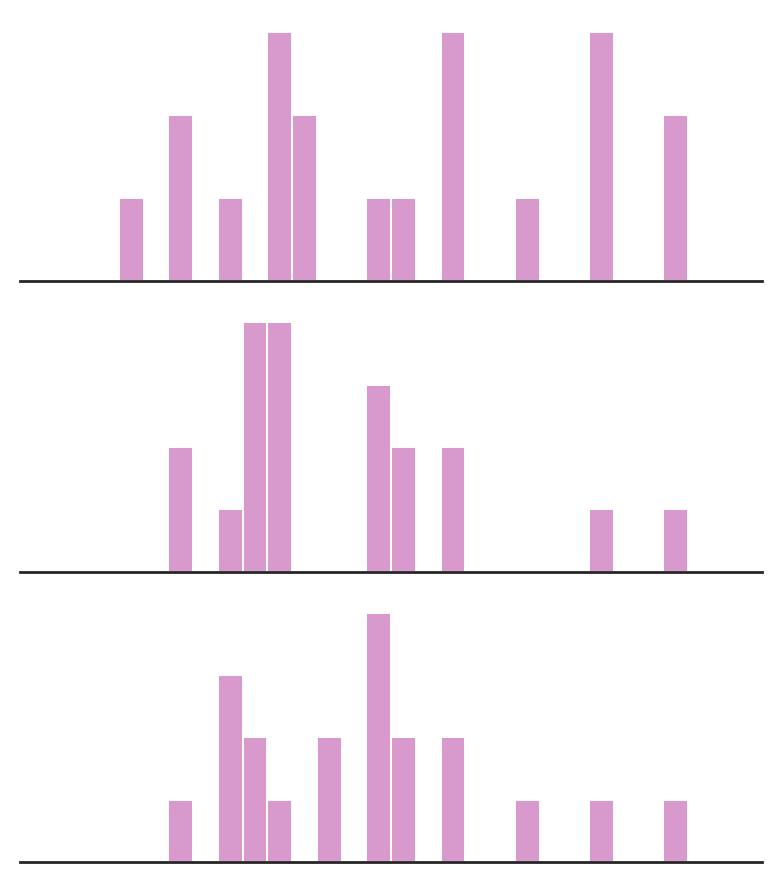

In [50]:
filename = os.path.join(DESTDIR, "miniplot_hist_bsamples_from_ksample02.pdf")
BIGPLOTSIZE = [MINIPLOTSIZE[0], MINIPLOTSIZE[1]*B]

with plt.rc_context({"figure.figsize":BIGPLOTSIZE}), sns.axes_style("ticks"):
    fig, axs = plt.subplots(B,1)
    for b in range(0,B):
        seed = seeds[b]
        ax = axs[b]
        np.random.seed(seed)
        bksample02 = np.random.choice(ksample02, size=len(ksample02))
        ax = sns.histplot(bksample02, stat="density", bins=bins, color=purple, ax=ax)
        ax.set_xlim([970,1030])
        ax.spines[['left', 'right', 'top']].set_visible(False)
        ax.set_yticks([])
        ax.set_yticklabels([])
        ax.set_ylabel(None)
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.set_xlabel(None)
    savefigure(fig, filename)

#### Minimal example

In [51]:
# one sample of observatiosn
xsample = [1, 2, 3, 4]

In [52]:
# one boostrap observation
np.random.seed(42)
bx = np.random.choice(xsample)
bx

3

In [53]:
# boostrap sample
np.random.seed(42)
bsample = np.random.choice(xsample, size=len(xsample))
bsample

array([3, 4, 1, 3])

#### General-purpose bootstrap estimation function

In [54]:
from ministats import gen_boot_dist

#### Example 6

Let's use the function `gen_boot_dist` to obtain the sampling distribution of the mean from the sample `ksample02`.

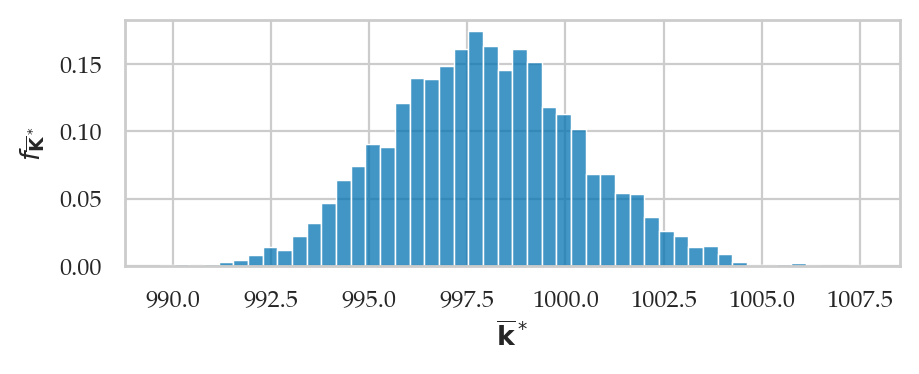

In [55]:
np.random.seed(42)
kbars_boot = gen_boot_dist(ksample02, estfunc=mean)
ax = sns.histplot(kbars_boot, stat="density")
ax.set_ylabel(r"$f_{\overline{\mathbf{K}}^*}$")
_ = ax.set_xlabel(r"$\overline{\mathbf{k}}^*$")

In [56]:
filename = os.path.join(DESTDIR, "kbars_boot_from_ksample02.pdf")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/kbars_boot_from_ksample02.pdf
Saved figure to figures/stats/estimators/kbars_boot_from_ksample02.png


We can obtain an bootstrap estimate of standard error of the mean by computing the 
standard deviation of the bootstrap distribution.

In [57]:
# boostrap est.     # simulation
np.std(kbars_boot), np.std(kbars20)

(2.415083743362255, 2.2080598530804387)

The expected value of the bootstrap distribution matches the sample mean.

In [58]:
# E[boostrap means]  # sample mean    # population 
np.mean(kbars_boot), mean(ksample02), muK

(997.9296855999999, 997.9069999999999, 1000)

### Analytical approximation formulas


#### Central limit theorem

In [59]:
# standard error of the mean
seKbar = sigmaK / np.sqrt(20)

# CLT prediction   # simulation
seKbar,            np.std(kbars20)

(2.23606797749979, 2.2080598530804387)

In [60]:
# CLT approx
from scipy.stats import norm
rvKbarCLT = norm(muK, seKbar)

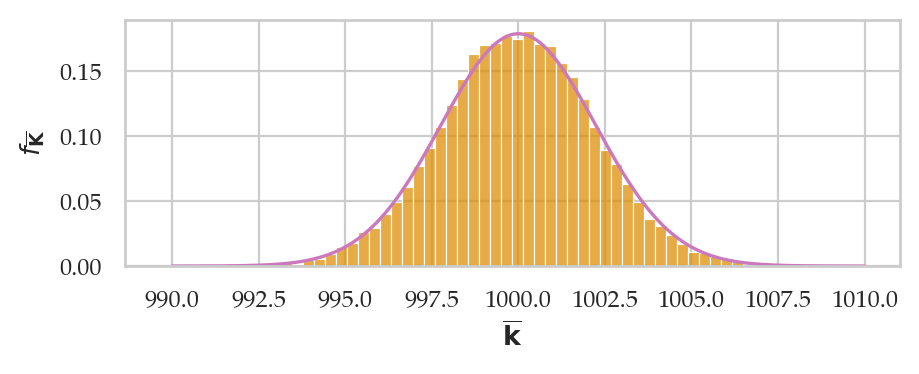

In [61]:
# kbars20 (repeat)
np.random.seed(43)
kbars20 = gen_sampling_dist(rvK, estfunc=mean, n=20)

# plot hist and pdf superimposed
ax = sns.histplot(kbars20, stat="density", bins=60, color=orange)
plot_pdf(rvKbarCLT, ax=ax, xlims=[990,1010], color="m")
ax.set_ylabel(r"$f_{\overline{\mathbf{K}}}$")
_ = ax.set_xlabel(r"$\overline{\mathbf{k}}$")

In [62]:
filename = os.path.join(DESTDIR, "sampling_dist_mean_rvK_and_CLT_n20.pdf")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/sampling_dist_mean_rvK_and_CLT_n20.pdf
Saved figure to figures/stats/estimators/sampling_dist_mean_rvK_and_CLT_n20.png


## Sampling distribution of the mean

### True sampling distribution

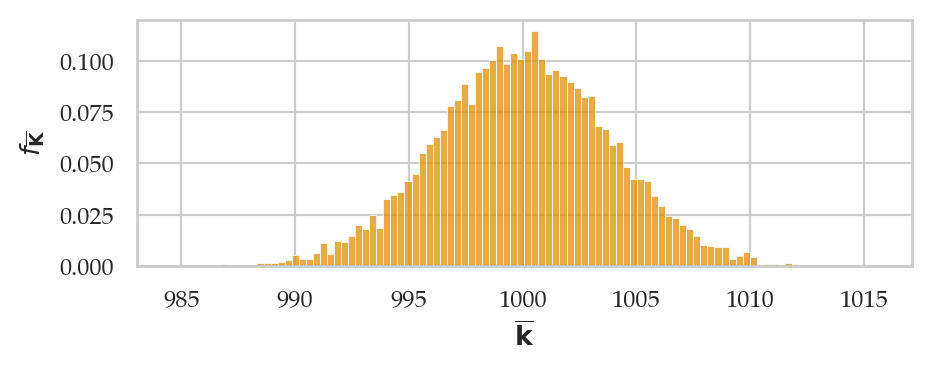

In [63]:
np.random.seed(43)
kbars7 = gen_sampling_dist(rvK, estfunc=mean, n=7)
ax = sns.histplot(kbars7, stat="density", bins=100, color=orange)
ax.set_ylabel(r"$f_{\overline{\mathbf{K}}}$")
_ = ax.set_xlabel(r"$\overline{\mathbf{k}}$")

In [64]:
np.std(kbars7)

3.8051688517483897

### Prediction of the central limit theorem

Compute the standard error using according to the central limit theorem
$\stderr{\overline{\mathbf{k}}} = \frac{\sigma_K}{\sqrt{n}}$:

In [65]:
seKbar = rvK.std() / np.sqrt(7)
seKbar

3.779644730092272

Sampling distribution of the mean according to CLT

In [66]:
rvKbarCLT = norm(muK, seKbar)

Let's now superimpose a lineplot of the analytical approximation formula
we obtain from the central limit theorem.

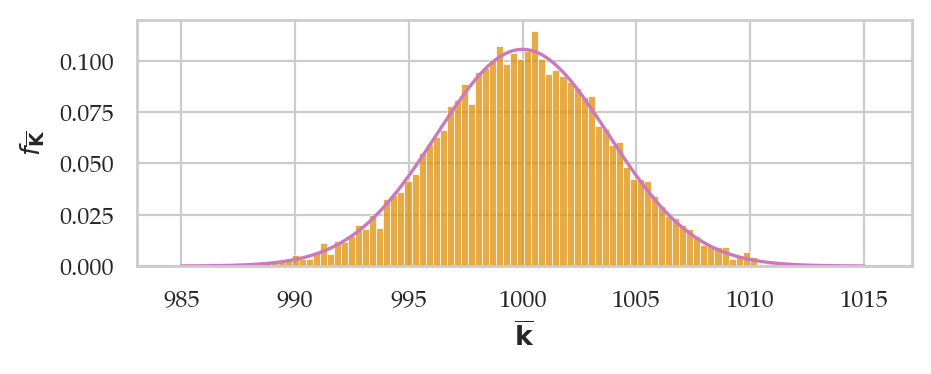

In [67]:
# plot hist and pdf superimposed
ax = sns.histplot(kbars7, stat="density", bins=100, color=orange)
plot_pdf(rvKbarCLT, ax=ax, xlims=[985,1015], color="m")
ax.set_ylabel(r"$f_{\overline{\mathbf{K}}}$")
_ = ax.set_xlabel(r"$\overline{\mathbf{k}}$")

In [68]:
filename = os.path.join(DESTDIR, "sampling_dist_mean_rvK_simulation_and_CLT_n7.pdf")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/sampling_dist_mean_rvK_simulation_and_CLT_n7.pdf
Saved figure to figures/stats/estimators/sampling_dist_mean_rvK_simulation_and_CLT_n7.png


### The plug-in principle

In [69]:
kombucha = pd.read_csv("../datasets/kombucha.csv")
batch03 = kombucha[kombucha["batch"]==3]
ksample03 = batch03["volume"]
ksample03.values

array([1005.19,  987.31, 1002.4 ,  991.96, 1000.17, 1003.94, 1012.79])

In [70]:
sehat03 = std(ksample03) / np.sqrt(7)
sehat03

3.220066336410536

### Normal approximation to the sampling distribution

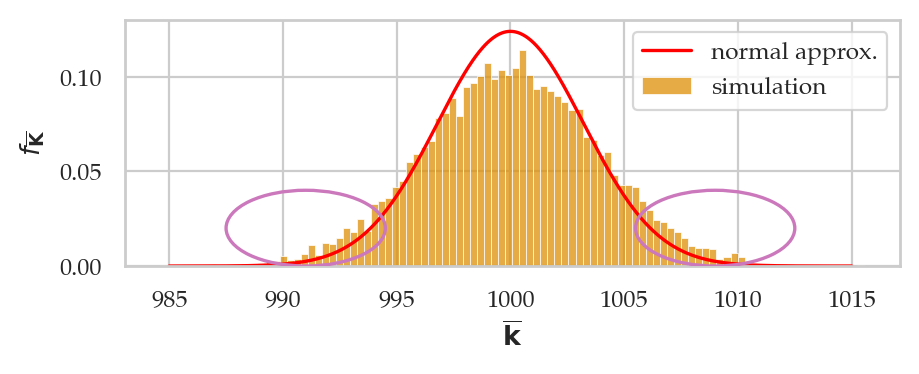

In [71]:
rvNKbar = norm(muK, sehat03)

ax = sns.histplot(kbars7, stat="density", bins=100, color=orange, label="simulation")
plot_pdf(rvNKbar, ax=ax, xlims=[985,1015], color="red", label="normal approx.")
ax.set_ylabel(r"$f_{\overline{\mathbf{K}}}$")
_ = ax.set_xlabel(r"$\overline{\mathbf{k}}$")


# FIGURES ONLY
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

hoffset = 9
voffset = 0.02
ewidth = 7
eheight = 0.04
ellipse1 = Ellipse((0, 0), width=ewidth, height=eheight, zorder=10,
                   facecolor='none', edgecolor='m', linewidth=1.2)
transf1 = transforms.Affine2D().translate(1000-hoffset, voffset)
ellipse1.set_transform(transf1 + ax.transData)
ax.add_patch(ellipse1)

ellipse2 = Ellipse((0, 0), width=ewidth, height=eheight, zorder=10,
                   facecolor='none', edgecolor='m', linewidth=1.2)
transf2 = transforms.Affine2D().translate(1000+hoffset, voffset)
ellipse2.set_transform(transf2 + ax.transData)
ax.add_patch(ellipse2)

In [72]:
filename = os.path.join(DESTDIR, "sampling_dist_mean_rvK_and_normal_approx_n7.pdf")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/sampling_dist_mean_rvK_and_normal_approx_n7.pdf
Saved figure to figures/stats/estimators/sampling_dist_mean_rvK_and_normal_approx_n7.png


### A better approximation

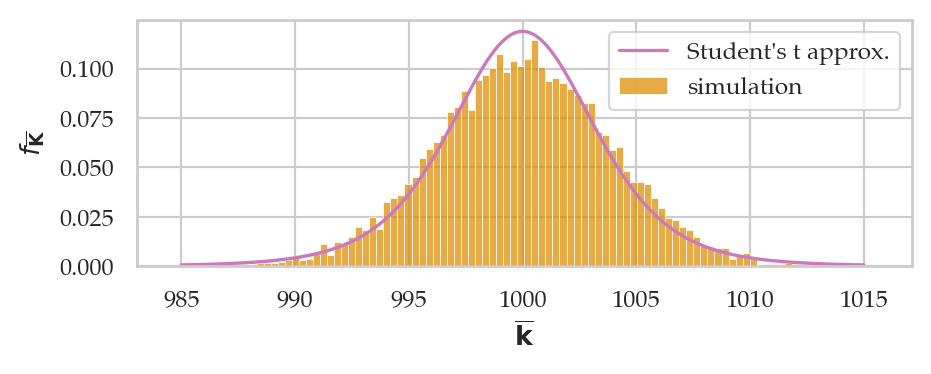

In [73]:
from scipy.stats import t as tdist

df = 7 - 1  # (n-1) degrees of freedom
rvTKbar = tdist(df, loc=muK, scale=sehat03)

ax = sns.histplot(kbars7, stat="density", bins=100, color=orange, label="simulation")
plot_pdf(rvTKbar, ax=ax, xlims=[985,1015], color="m", label="Student's t approx.")
ax.set_ylabel(r"$f_{\overline{\mathbf{K}}}$")
_ = ax.set_xlabel(r"$\overline{\mathbf{k}}$")

In [74]:
filename = os.path.join(DESTDIR, "sampling_dist_mean_rvK_and_T_approx_n7.pdf")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/sampling_dist_mean_rvK_and_T_approx_n7.pdf
Saved figure to figures/stats/estimators/sampling_dist_mean_rvK_and_T_approx_n7.png


In [75]:
# Student's t       # simulation
rvTKbar.std(),      np.std(kbars7)

(3.943759731059507, 3.8051688517483897)

### Bootstrapped sampling distribution of the sample mean

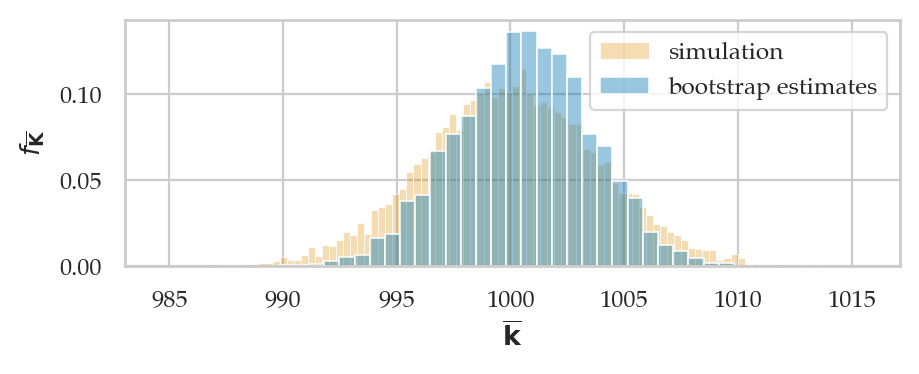

In [76]:
# ground truth (in orange)
ax = sns.histplot(kbars7, stat="density", bins=100,
                  color=orange, alpha=0.3, label="simulation")

# bootstrap estimate (in blue)
np.random.seed(48)
kbars_boot03 = gen_boot_dist(ksample03, estfunc=mean)
sns.histplot(kbars_boot03, ax=ax, stat="density", bins=30,
             alpha=0.4, label="bootstrap estimates")
ax.set_ylabel(r"$f_{\overline{\mathbf{K}}}$")
_ = ax.set_xlabel(r"$\overline{\mathbf{k}}$")
plt.legend()

In [77]:
filename = os.path.join(DESTDIR, "bootstrap_dist_mean_kombucha_ksample03.pdf")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/bootstrap_dist_mean_kombucha_ksample03.pdf
Saved figure to figures/stats/estimators/bootstrap_dist_mean_kombucha_ksample03.png


The expected value of the sampling distribution
we obtained using bootstrap estimation is

In [78]:
# E[boostrap dist.]    # sample mean     # population mean
np.mean(kbars_boot03), mean(ksample03),  muK

(1000.5607797142856, 1000.5371428571428, 1000)

The standard error of the sampling distribution

In [79]:
# boostrap est.       # simulation
np.std(kbars_boot03), np.std(kbars7)

(2.9673068567038365, 3.8051688517483897)

In [80]:
# sample std        # population std
std(ksample03),     sigmaK

(8.519494731273129, 10)

## Sampling distribution of the variance

### Sampling distribution of the variance


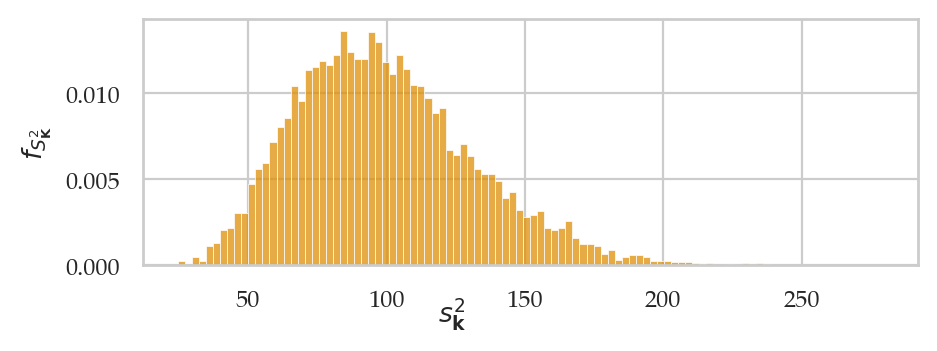

In [81]:
np.random.seed(44)
kvars20 = gen_sampling_dist(rvK, estfunc=var, n=20)
ax = sns.histplot(kvars20, stat="density", bins=100, color=orange)
ax.set_ylabel(r"$f_{S^2_{\mathbf{K}}}$")
_ = ax.set_xlabel(r"$s^2_{\mathbf{k}}$")
ax.xaxis.set_label_coords(.4, -.12)

5.2631578947368425


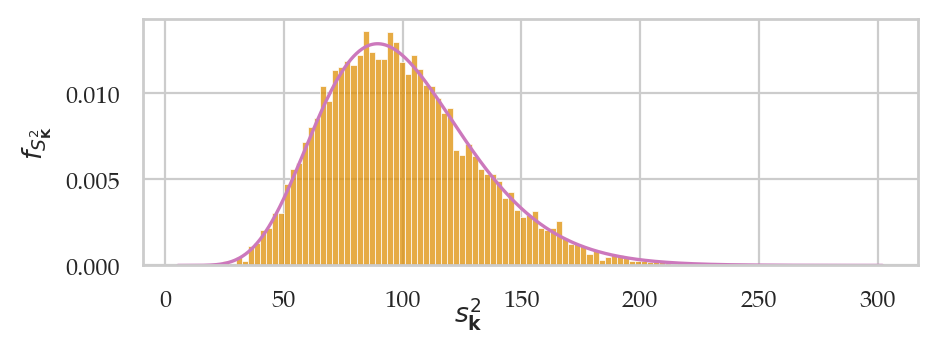

In [82]:
from scipy.stats import chi2

df = 20 - 1
scale = sigmaK**2 / (20-1)
print(scale)
rvS2 = chi2(df, scale=scale)

ax = sns.histplot(kvars20, stat="density", bins=100, color=orange)
plot_pdf(rvS2, ax=ax, color="m")
ax.set_ylabel(r"$f_{S^2_{\mathbf{K}}}$")
_ = ax.set_xlabel(r"$s^2_{\mathbf{k}}$")
ax.xaxis.set_label_coords(.42, -.12)

In [83]:
filename = os.path.join(DESTDIR, "sampling_dist_var_rvK_and_X2_approx_n20.pdf")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/sampling_dist_var_rvK_and_X2_approx_n20.pdf
Saved figure to figures/stats/estimators/sampling_dist_var_rvK_and_X2_approx_n20.png


### Bootstrapped sampling distribution of the sample variance

Let's look again at the sample `ksample02` that comes from Batch 02 of the kombucha bottling plant.

In [84]:
kombucha = pd.read_csv("../datasets/kombucha.csv")
batch02 = kombucha[kombucha["batch"]==2]
ksample02 = batch02["volume"]
ksample02.count()

20

The sample variance we find from `ksample02` is an over-estimate
of the population variance:

In [85]:
# sample var         # population var
var(ksample02),      sigmaK**2

(124.31760105263139, 100)

So we should expect the boostrap estimate we obtain
by resampling from `ksample02` will also be an overestimate of the population.

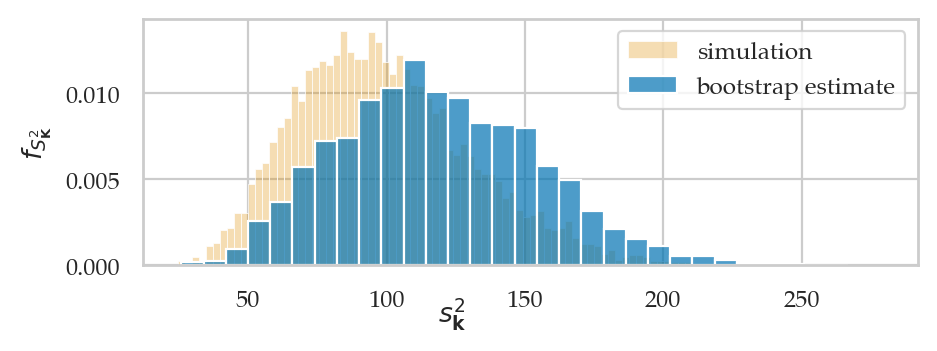

In [86]:
# ground truth (in orange)
ax = sns.histplot(kvars20, stat="density", bins=100,
                  color=orange, alpha=0.3, label="simulation")

np.random.seed(49)
kvars_boot02 = gen_boot_dist(ksample02, estfunc=var)

# bootstrap estimate (in blue)
ax = sns.histplot(kvars_boot02, ax=ax, stat="density", bins=30,
                  alpha=0.7, label="bootstrap estimate")
ax.set_ylabel(r"$f_{S^2_{\mathbf{K}}}$")
_ = ax.set_xlabel(r"$s^2_{\mathbf{k}}$")
_ = ax.xaxis.set_label_coords(.4, -.12)
plt.legend()

In [87]:
filename = os.path.join(DESTDIR, "bootstrap_dist_var_kombucha_ksample02.pdf")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/bootstrap_dist_var_kombucha_ksample02.pdf
Saved figure to figures/stats/estimators/bootstrap_dist_var_kombucha_ksample02.png


## Difference between means estimator


### Analytical formula for the sampling distribution


#### Approximation using Student's $t$-distribution


In [88]:
def calcdf(stdX, n, stdY, m):
    vX = stdX**2 / n
    vY = stdY**2 / m
    df = (vX + vY)**2 / (vX**2/(n-1) + vY**2/(m-1))
    return df

### Example 7: difference between electricity prices


In [89]:
eprices = pd.read_csv("../datasets/eprices.csv")
pricesW = eprices[eprices["loc"]=="West"]["price"]
pricesE = eprices[eprices["loc"]=="East"]["price"]

In [90]:
dhat = dmeans(pricesW, pricesE)
dhat

3.0000000000000018

In [91]:
# std and sample size in the East
stdW, nW = pricesW.std(), pricesW.count()

# std and sample size in the West
stdE, nE = pricesE.std(), pricesE.count()

stdW, nW, stdE, nE

(1.5621388471508475, 9, 0.8776547030454391, 9)

In [92]:
seD = np.sqrt(stdW**2/nW + stdE**2/nE)
seD

0.5972674401486562

In [93]:
df = calcdf(stdW, nW, stdE, nE)
df

12.59281702723103

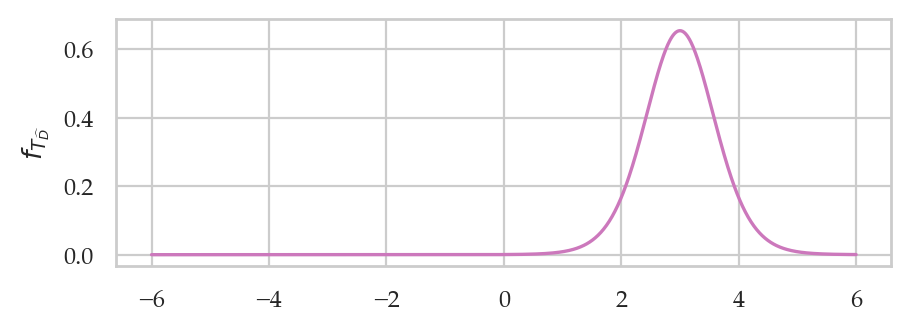

In [94]:
from scipy.stats import t as tdist
rvTDhat = tdist(df, loc=dhat, scale=seD)
ax = plot_pdf(rvTDhat, rv_name="D", xlims=[-6,6], color="m")
_ = ax.set_ylabel(r"$f_{T_{\widehat{D}}}$")
_ = ax.set_xlabel(None)

In [95]:
filename = os.path.join(DESTDIR, "tdist_approx_for_eprices_dmeans.pdf")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/tdist_approx_for_eprices_dmeans.pdf
Saved figure to figures/stats/estimators/tdist_approx_for_eprices_dmeans.png


#### Bootstrapped sampling distribution of the difference between means

In [96]:
xbarsW_boot = gen_boot_dist(pricesW, estfunc=mean)
xbarsE_boot = gen_boot_dist(pricesE, estfunc=mean)

Text(0, 0.5, '$f_{\\widehat{D}^*}$')

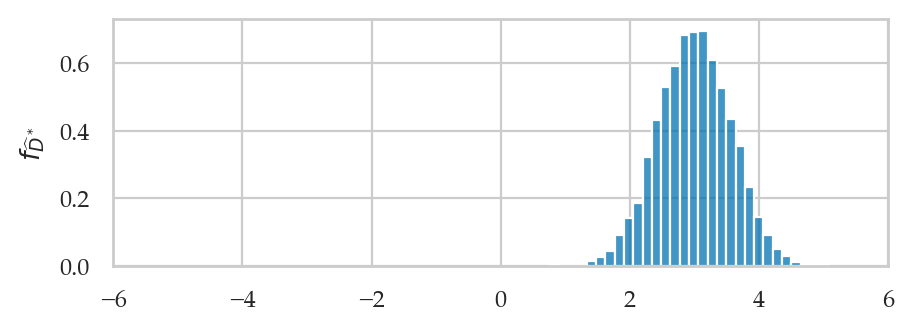

In [97]:
dhats_boot = np.subtract(xbarsW_boot, xbarsE_boot)

ax = sns.histplot(dhats_boot, stat="density", bins=30)
_ = ax.set_xlim([-6,6])
ax.set_ylabel(r"$f_{\widehat{D}^*}$")
# _ = ax.set_xlabel("$\hat{d}$")

In [98]:
filename = os.path.join(DESTDIR, "bootstrap_dist_eprices_dmeans.pdf")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/bootstrap_dist_eprices_dmeans.pdf
Saved figure to figures/stats/estimators/bootstrap_dist_eprices_dmeans.png


## Explanations

### Biased and unbiased estimators for the population variance

The sample variance estimator 
$s_{\mathbf{x}}^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i - \overline{\mathbf{x}})^2$
is an *unbiased* estimator of the population variance.

Let's see what happens if we the estimator 
$\tilde{s}_{\mathbf{x}}^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \overline{x})^2$,
which has denominator $n$ instead of $(n-1)$.

First, let's define the Python function that performs this calculation:

In [99]:
def altvar(sample):
    xbar = mean(sample)
    sumsqdevs = sum([(xi-xbar)**2 for xi in sample])
    return sumsqdevs / len(sample)

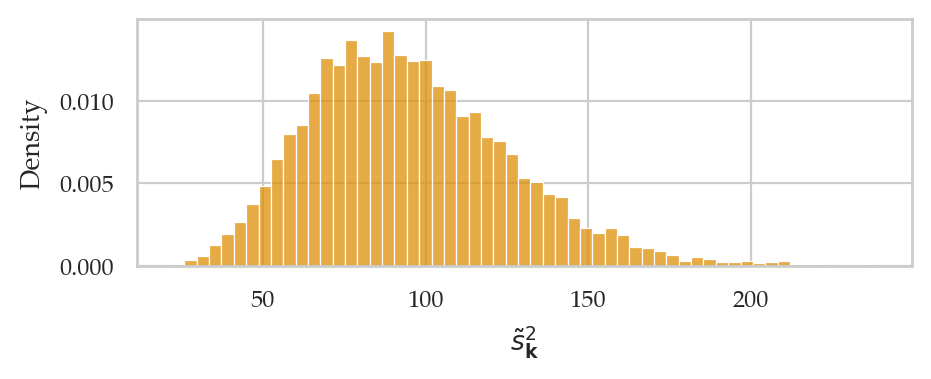

In [100]:
from scipy.stats import norm
muK = 1000
sigmaK = 10
rvK = norm(muK, sigmaK)

np.random.seed(16)
altvars = gen_sampling_dist(rvK, estfunc=altvar, n=20)
ax = sns.histplot(altvars, stat="density", color=orange)
_ = ax.set_xlabel(r"$\tilde{s}^2_{\mathbf{k}}$")

### Pivotal quantities


### Shifted sampling distributions

Two contexts for using sampling distribution:

-   **Case 1**: the population mean $\mu_X$ is known. We draw the
    sampling distribution centred on the population mean $\mu_X$:
    $$T_B
       \;\; \sim \;\;
       \mathcal{T}(n-1, \;
                   \tt{loc}\!=\mu_X, \;
                   \tt{scale}\!=\!\stderrhat{\overline{\mathbf{x}}}).
    $$

-   **Case 2**: the population mean $\mu_X$ is unknown. We can draw the
    sampling distribution centred on the sample mean
    $\overline{\mathbf{x}}$:
    $$ T_A
       \;\; \sim \;\;
       \mathcal{T}(n-1, \;
                   \tt{loc}\!=\overline{\mathbf{x}}, \;
                   \tt{scale}\!=\!\stderrhat{\overline{\mathbf{x}}}).
    $$


Essentially, the sampling distribution formula we obtained describes the
distribution of the deviations of the sample mean from the population
mean: $\overline{\mathbf{x}} - \mu_X$, so this is why we can use the
same distribution in both contexts.

Text(209.54547874974753, 0.1, '$\\mathbf{u}_{\\mu_A}$')

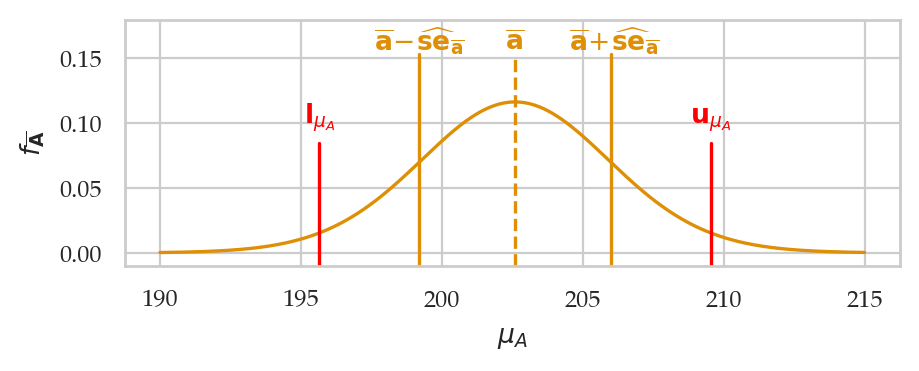

In [101]:
apples = pd.read_csv("../datasets/apples.csv")
asmpale = apples["weight"]
n = asample.count()
abar =  mean(asample)
asehat = std(asample) / np.sqrt(n)

# analytical approx.
from scipy.stats import t as tdist
df = n - 1
rvTAbar = tdist(df, loc=abar, scale=asehat)
ax = plot_pdf(rvTAbar, xlims=[190,215], color=orange)
ax.set_ylim([-0.01,0.18])
ax.set_ylabel(r"$f_{\overline{\mathbf{A}}}$")
# _ = ax.set_xlabel(None)
# _ = ax.set_xlabel("$\overline{\mathbf{a}}$")
_ = ax.set_xlabel(r"$\mu_A$")

# # boostrap approx.
# abars_boot = gen_boot_dist(asample, estfunc=mean)
# sns.histplot(abars_boot, ax=ax, bins=30, stat="density", color=orange, alpha=0.5)

# sample mean
ax.axvline(abar, ymin=0, ymax=0.86, linestyle="--", color=orange)
ax.text(abar, 0.157, r"$\overline{\mathbf{a}}$", ha="center", color=orange)

# sample mean +/- se
ax.axvline(abar+asehat, ymin=0, ymax=0.86, linestyle="-", color=orange)
ax.text(abar+asehat+0.13, 0.157, 
        r"$\overline{\mathbf{a}}\!+\!\widehat{\mathbf{se}}_{\overline{\mathbf{a}}}$",
        ha="center", color=orange)
ax.axvline(abar-asehat, ymin=0, ymax=0.86, linestyle="-", color=orange)
ax.text(abar-asehat, 0.157, 
        r"$\overline{\mathbf{a}}\!-\!\widehat{\mathbf{se}}_{\overline{\mathbf{a}}}$",
        ha="center", color=orange)


# 95% confidence interval
t_l = rvTAbar.ppf(0.025)
ax.axvline(t_l, ymin=0, ymax=0.5, linestyle="-", color="red")
ax.text(t_l, 0.1, r"$\mathbf{l}_{\mu_A}$", ha="center", color="red")
t_u = rvTAbar.ppf(0.975)
ax.axvline(t_u, ymin=0, ymax=0.5, linestyle="-", color="red")
ax.text(t_u, 0.1, r"$\mathbf{u}_{\mu_A}$", ha="center", color="red")

In [102]:
filename = os.path.join(DESTDIR, "task_E_apple_mean.pdf")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/task_E_apple_mean.pdf
Saved figure to figures/stats/estimators/task_E_apple_mean.png


In **Case P** we know the population mean, and the random variable $T_B$
describes what kind of sample means we can expect to observe.
We'll use this type of reasoning for hypothesis testing.


999.10375 995.9955 40


Text(995.8955, 0.31, '$\\overline{\\mathbf{k}}_{06}$')

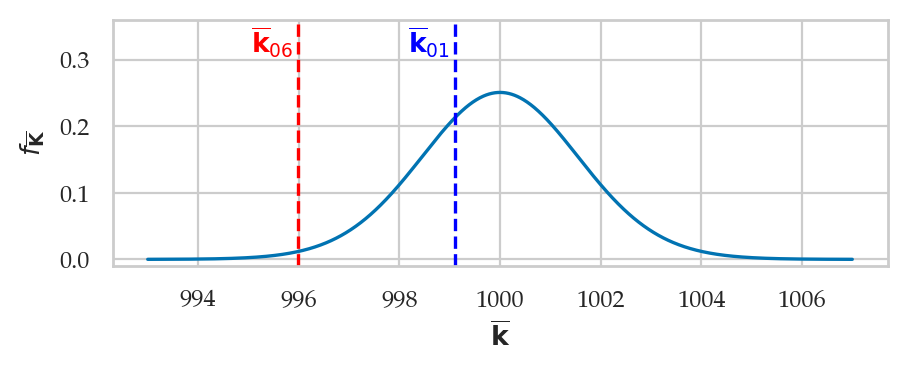

In [103]:
kombucha = pd.read_csv("../datasets/kombucha.csv")
ksample01 = kombucha[kombucha["batch"]==1]["volume"]
ksample06 = kombucha[kombucha["batch"]==6]["volume"]

kbar01 = mean(ksample01)
kbar06 = mean(ksample06)
n = ksample01.count()
assert ksample06.count() == n
print(kbar01, kbar06, n)

# analytical approx.
from scipy.stats import t as tdist
df = n - 1
rvTKbar = tdist(df, loc=muK, scale=sigmaK/np.sqrt(n))
ax = plot_pdf(rvTKbar, xlims=[993,1007], color=blue)
ax.set_ylabel(r"$f_{\overline{\mathbf{K}}}$")
ax.set_ylim([-0.01,0.36])
_ = ax.set_xlabel(r"$\overline{\mathbf{k}}$")

# sample mean ksample01
ax.axvline(kbar01, linestyle="--", color="blue")
ax.text(kbar01-0.1, 0.31, r"$\overline{\mathbf{k}}_{01}$", ha="right", color="blue")

# sample mean ksample06
ax.axvline(kbar06, linestyle="--", color="red")
ax.text(kbar06-0.1, 0.31, r"$\overline{\mathbf{k}}_{06}$", ha="right", color="red")

In [104]:
filename = os.path.join(DESTDIR, "task_P_kombucha_means.pdf")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/task_P_kombucha_means.pdf
Saved figure to figures/stats/estimators/task_P_kombucha_means.png


## Discussion

Congratulations on surviving until the end this notebook!
In the remainder of this chapter and the next, we'll learn
about various applications of the formulas we introduces in this section.
Basically, it's all downhill from here.

In the next notebook, we'll learn how to use everything we learned about
sampling distributions to calculate [confidence intervals](./32_confidence_intervals.ipynb).

## CUT MATERIAL

In **Case 2**, we know the sample mean, so we can use the approximation
to build a distribution that describes our inference about what
population mean $\mu_X$ could have led to the observed sample.

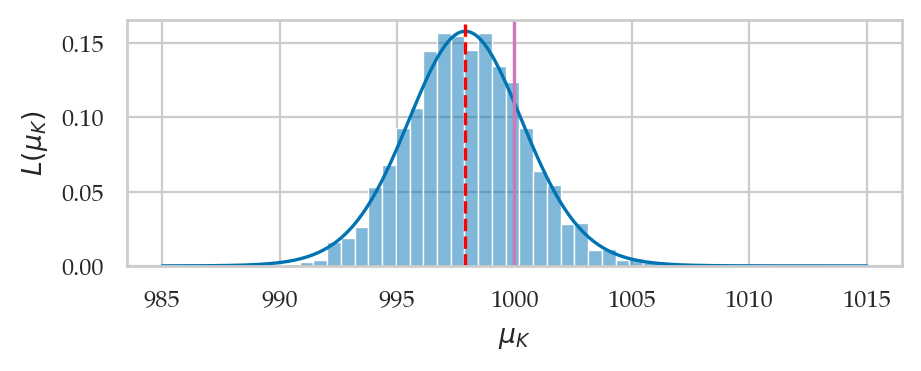

In [105]:
from scipy.stats import t as tdist

kbar02 = mean(ksample02)
n = ksample02.count()
sehat02 = std(ksample02) / np.sqrt(n)

# analytical approx.
df = n - 1
rvTA = tdist(df, loc=kbar02, scale=sehat02)
ax = plot_pdf(rvTA, xlims=[985,1015])
ax.set_ylabel(r"$L(\mu_K)$")
_ = ax.set_xlabel(r"$\mu_K$")

# boostrap approx.
kbars02_boot = gen_boot_dist(ksample02, estfunc=mean)
sns.histplot(kbars02_boot, ax=ax, bins=30, stat="density", alpha=0.5)

# population mean
ax.axvline(muK, color="m")

# sample mean
ax.axvline(kbar02, linestyle="--", color="red")

In [106]:
filename = os.path.join(DESTDIR, "contextA_rvTA_and_boot_from_ksample02.pdf")
savefigure(ax, filename)

Saved figure to figures/stats/estimators/contextA_rvTA_and_boot_from_ksample02.pdf
Saved figure to figures/stats/estimators/contextA_rvTA_and_boot_from_ksample02.png
